In [1]:
%matplotlib inline

import umap
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style("whitegrid")

In [2]:
c_icut = "#e4eaed"
c_icut2 = "#34495e"
c_rxnenum = "#065535"
c_rxnenum = "#cf9b00"
c_dexom = "#e74c3c"
c_maxdist = "#6a3d9a"

m_dexom = 'dexom' #dexom diversity-enum (or dexom-default method)
m_maxdist = 'icut'
m_icut = 'maxdist'
m_rxnenum = 'rxnenum' # Reaction-enum method

list_methods = [m_dexom, m_maxdist, m_rxnenum, m_icut]
list_colors = [c_dexom, c_maxdist, c_rxnenum, c_icut2]


pal_rxnenum = sns.color_palette([c_icut, c_rxnenum])
pal_dexom = sns.color_palette([c_icut, c_dexom])
pal_maxdist = sns.color_palette([c_icut, c_maxdist])
pal_icut = sns.color_palette([c_icut, c_icut2])

state = np.random.RandomState(seed=42)

In [3]:
def plot_embedding(ax, df_embedding, method, color, title, x='UMAP1', y='UMAP2'):
    ax.set(aspect='equal')
    sns.scatterplot(x=x, y=y, data = df_embedding[[x,y]], ax = ax, linewidth=0,
                    alpha=background_alpha, color=c_icut, rasterized=True)
    df = df_embedding[df_embedding.method==method]
    sns.scatterplot(x=x, y=y, data = df, ax = ax, linewidth=0, alpha=method_alpha, color=color, rasterized=True)
    ax.set_title(title, fontsize=14)

## Load cancer cell line reconstruction

In [4]:
df_reconstruction = pd.read_csv('results/cancer/csv/A375_10_90.csv.zip')
df_reactions = df_reconstruction.drop('label', axis=1)
labels = df_reconstruction.label.squeeze().values.tolist()
df_reactions

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s2508,s2509,s2510,s2511,s2512,s2513,s2514,s2515,s2516,s2517
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10964,1,1,0,0,0,0,1,1,0,0,...,1,1,0,0,1,0,0,0,1,0
10965,1,1,0,0,0,0,1,1,0,0,...,1,1,0,0,1,0,0,0,0,0
10966,1,1,0,0,0,0,1,1,0,0,...,1,1,0,0,1,0,0,0,0,0
10967,1,1,0,0,0,0,1,1,0,0,...,1,1,0,0,1,0,0,0,0,0


In [7]:
# NOTE: Results are exported using the exportResults.m script included in DEXOM
embedding = umap.UMAP(metric="hamming", random_state=state, n_neighbors=30, unique=True).fit_transform(df_reactions)

df_embedding = pd.DataFrame(embedding, columns=['UMAP1','UMAP2'])
df_embedding['method'] = labels
df_embedding.head()

C:\Users\pablo\miniconda3\lib\site-packages\umap\umap_.py:1530: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


,UMAP1,UMAP2,method
0,-1.340133,7.531512,dexom
1,1.494265,8.344641,dexom
2,1.272786,5.948908,dexom
3,-3.019367,8.899066,dexom
4,6.940256,7.870803,dexom


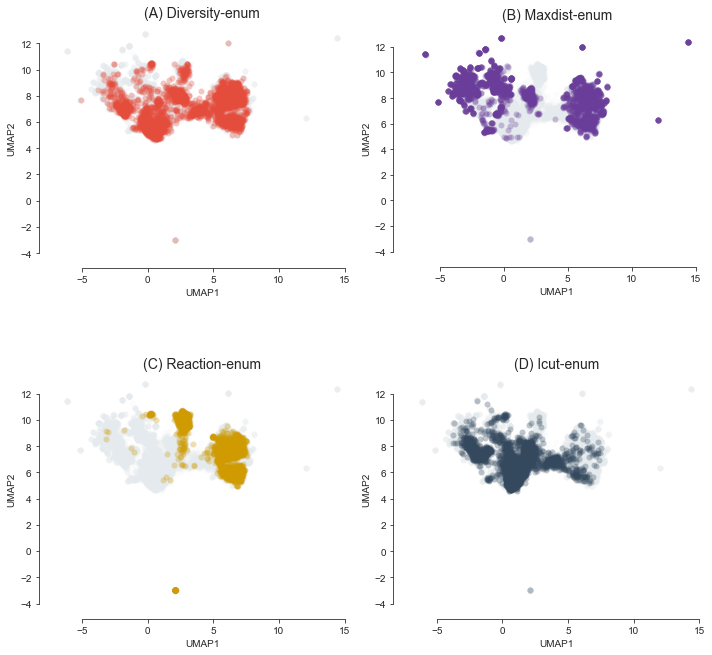

In [8]:
sns.set_style("ticks")

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=False)

background_alpha = 0.1
method_alpha = 0.3

ax = axs[0,0]
plot_embedding(ax, df_embedding, m_dexom, c_dexom, '(A) Diversity-enum')

ax = axs[0,1]
plot_embedding(ax, df_embedding, m_maxdist, c_maxdist, '(B) Maxdist-enum')

ax = axs[1,0]
plot_embedding(ax, df_embedding, m_rxnenum, c_rxnenum, '(C) Reaction-enum')

ax = axs[1,1]
plot_embedding(ax, df_embedding, m_icut, c_icut2, '(D) Icut-enum')


sns.despine(offset=15, trim=True);
plt.tight_layout()

#fig.savefig('figures/figure_cancer.pdf')